# Business Understanding

## Wie (de opdrachtgever)? 

Appbakkers (Corné & Guido) is een bedrijf die (mobiele) applicaties ontwikkeld.  

 

## Wat (de opdracht)? 

Bij opname van een patiënt wordt er een elektrocardiogram (ECG) gemaakt. Hierbij worden alle elektrische impulsen in het hart geregistreerd, waardoor kan worden afgeleid welke gebieden van het hart naar behoren functioneren.  

Arts-onderzoekers vragen zich af of het aantal hartslagen per minuut een goede voorspeller kan zijn van de calciumscore. Gebruik de ECG-datasets om per dataset het gemiddelde aantal hartslagen per minuut te bepalen (bedenk goed welke onderdelen van de ECGs je hiervoor allemaal gaat gebruiken): indien deze boven de 100 slagen per minuut is heet dit tachycardie, indien deze onder de 60 slagen per minuut is heet dit bradycardie.  

Onderzoek daarna met deze resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen. Bepaal hierna of de datasets een regelmatig of onregelmatig hartritme vertonen en probeer je model hiermee te verbeteren. Kan je model nu accuraat de calciumscore voorspellen? Zijn er risico’s bij het gebruik van je model in de praktijk? Als je nog tijd over hebt, is het interessant om je gegevens te combineren met die van opdracht 1. Kan je elkaars modellen verder verbeteren? 

 

## Wanneer (tijdsframe)? 

Deze opdracht voeren we uit vanaf 13 april ’22. Op deze dag hebben we de kennismaking gehad met onze opdrachtgever. Hierin hebben we de opdracht besproken en een aantal afspraken gemaakt. De einddatum van de opdracht zal zijn op 3 juni ’22. 

 

## Waarom (doel)? 

Het doel is om te achterhalen of hartslag een goede voorspeller kan zijn van de calciumscore. 

Als het model gemaakt is om dit te voorspellen kan deze verbeterd/uitgebreid worden met de resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen.  

 

## Wat (wat gaan we gebruiken)? 

Door middel van Jupyter notebooks gaan wij het model ontwikkelen.  
ECG viewer om ECG´s bestanden door te lezen. 

# Data Understanding

Wij hebben 2 publieke datasets gekregen om mee bezig te gaan. Deze zijn "cardio_train.csv" en "riskchartsampledata.xlsx". Hieronder is te lezen wat de kolommen in deze datasets betekenen.

### "cardio_train.csv"

* id          
    De id van de rij, **integer** <br/>
* age         
    De leeftijd van de patient in dagen, **integer** <br/>
* gender      
    Het geslacht van de patient, waarbij 1 een man is en 2 een vrouw, **category** <br/>
* height      
    De lengte van de patient, gegeven in centimeters, **integer** <br/>
* weight      
    Het gewicht van de patient, gegeven in kilogram, **float** <br/>
* ap_hi       
    De bovendruk van de patient, **integer**  <br/>
* ap_lo       
    De onderdruk van de patient, **integer**  <br/>
* cholesterol <br/>
    Hoe veel cholesterol de patient heeft, **category**  <br/>
* gluc        
    Hoe veel glucoses de patient heeft, **category**  <br/>
* smoke       
    Of de patient rookt, **boolean** <br/>
* alco        
    Of de patient alcohol drinkt, **boolean** <br/>
* active      
    Of de patient actief is in het dagelijks leven, **boolean** <br/>
* cardio      
    Of de patient een cardiovasculaire ziekte heeft, **boolean** <br/>

### "riskchartsampledata.xlsx"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from collections import Counter

In [3]:
cardio_train = pd.read_csv("Data/cardio_train.csv", delimiter=';')

In [4]:
def GiveInformationOfDataframe(df):
    print("De kolomtypes:")
    print(df.dtypes)
    print()
    print("Beschrijving van de kolommen")
    print(df.describe().transpose())
    print()
    print("    Vorm van de data:")
    print("Aantal rijen: ")
    print(df.shape[0])
    print("Aantal kolommen: ")
    print(df.shape[1])
    print()
    print("De bovenste rijen: ")
    print(df.head(5))
    print()
    print("Verdere info: ")
    print(df.info())

In [5]:
##pp.ProfileReport(cardio_train)
#GiveInformationOfDataframe(cardio_train)

In [6]:
#sns.pairplot(cardio_train)

In [7]:
cardio_train[['gender','height']].groupby('gender').agg(np.mean)

,height
gender,
1,161.355612
2,169.947895


De personen met 2 als gender zijn gemiddeld langer, dus is de 2 een man en 1 een vrouw.

# Data Preparation

In [8]:
cardio_train.astype({'gender':'category','cholesterol':'category','gluc':'category','smoke':'bool','alco':'bool','active':'bool','cardio':'bool'}, copy=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,False,False,True,False
1,1,20228,1,156,85.0,140,90,3,1,False,False,True,True
2,2,18857,1,165,64.0,130,70,3,1,False,False,False,True
3,3,17623,2,169,82.0,150,100,1,1,False,False,True,True
4,4,17474,1,156,56.0,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,True,False,True,False
69996,99995,22601,1,158,126.0,140,90,2,2,False,False,True,True
69997,99996,19066,2,183,105.0,180,90,3,1,False,True,False,True
69998,99998,22431,1,163,72.0,135,80,1,2,False,False,False,True


## Aanpassen van data

In [9]:
cardio_train.astype('category',copy=False)

# Het uitrekenen van de leeftijd in jaren
cardio_train['age_in_years'] = (cardio_train['age']/365).agg(np.round)

# Het uitrekenen van de BMI
cardio_train['bmi'] = cardio_train['weight'] / (cardio_train['height']/100)**2 

# Het verschil tussen de hoge en lage bloeddruk berekenen.
cardio_train['ap_difference'] = cardio_train['ap_hi'] - cardio_train['ap_lo']

In [10]:
cardio_train.drop_duplicates(inplace=True)
data = cardio_train

# BMI verwijderen hoger dan 60.
data = data[~(data['bmi']>60)]

# ap_hi kan niet lager zijn dan ap_lo
data = data[:][data['ap_hi'] > data['ap_lo']]

# Hoge bloeddruk boven 220 & lage bloeddruk boven 180 verwijderen.
high_ap_filter = ((data["ap_hi"]>220) | (data["ap_lo"]>180))
data = data[~high_ap_filter]

# Lage bloeddruk onder 40 & lage bloeddruk onder 40 verwijderen.
low_ap_filter = ((data["ap_hi"] < 40) | (data["ap_lo"] < 40))
data = data[~low_ap_filter]

labels = data['cardio']

## Normalisatie

In [11]:
#df_norm = df.drop(columns=['kolommen_met_text']).copy()
df_norm = data
df_norm = df_norm - df_norm.mean()
df_norm = df_norm / df_norm.std()

In [12]:
#df_norm.describe()

## Outliers verwijderen

In [13]:
def remove_outliers(df, features):
    for col in features:
        #Q1 = mediaan van de eerste helft
        Q1 = df[col].quantile(0.25)
        #Q3 = mediaan van tweede helft
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        inner_lower_fence = Q1 - 1.5 * IQR   
        outer_lower_fence = Q3 + 1.5 * IQR
        
        # outliers omzetten naar nan
        df.loc[df[col] < inner_lower_fence,col] = np.nan
        df.loc[df[col] > outer_lower_fence,col] = np.nan
        
        # nan droppen en returnen
    return df.dropna()

In [14]:
# dataset, list of features
#df_out = remove_outliers(df_norm, ["age", "height", "weight", "ap_hi", "ap_lo", "bmi", "ap_difference", "age_in_years"])

In [15]:
df_out = df_norm

# Modeling

## KMeans

In [16]:
# Overige kollommen verwijderen
df_kmeans = df_out[["age", "height", "weight", "ap_hi", "ap_lo", "bmi", "ap_difference"]]
df_out = df_out.drop('age_in_years', 1)                   

C:\Users\Robert\AppData\Local\Temp/ipykernel_5600/1599696886.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_out = df_out.drop('age_in_years', 1)


### Elbowplot maken

<AxesSubplot:title={'center':'Elleboog Grafiek'}, xlabel='Aantal clusters'>

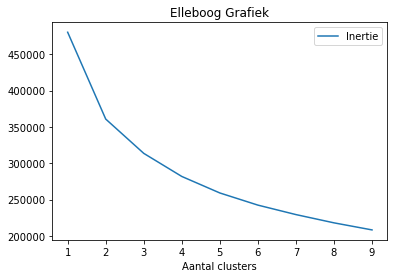

In [17]:
cluster_options = [1,2,3,4,5,6,7,8,9]
inertia_vs_no_clusters = []
for no_clusters in cluster_options:
    
    kmeans = KMeans(n_clusters=no_clusters)
    
    inertia_vs_no_clusters.append(kmeans.fit(df_kmeans).inertia_)
    
inertia_results = pd.DataFrame({"Aantal clusters": cluster_options, "Inertie":inertia_vs_no_clusters})

inertia_results.plot(x='Aantal clusters', y="Inertie", title='Elleboog Grafiek')

Uit de Elbowplot is op te maken dat 2 clusters het beste is

### KMeans uitvoeren

In [21]:
kmeans = KMeans(n_clusters=2) #Gekozen clusters invullen
cardio_train_kmeans = kmeans.fit(df_out)

### Labels toevoegen aan niet genormaliseerde data

In [22]:
data['cluster'] = cardio_train_kmeans.labels_

### Pairplot op niet genormailiseerde data, kleuring op clustering, kollom cluster gedropt.

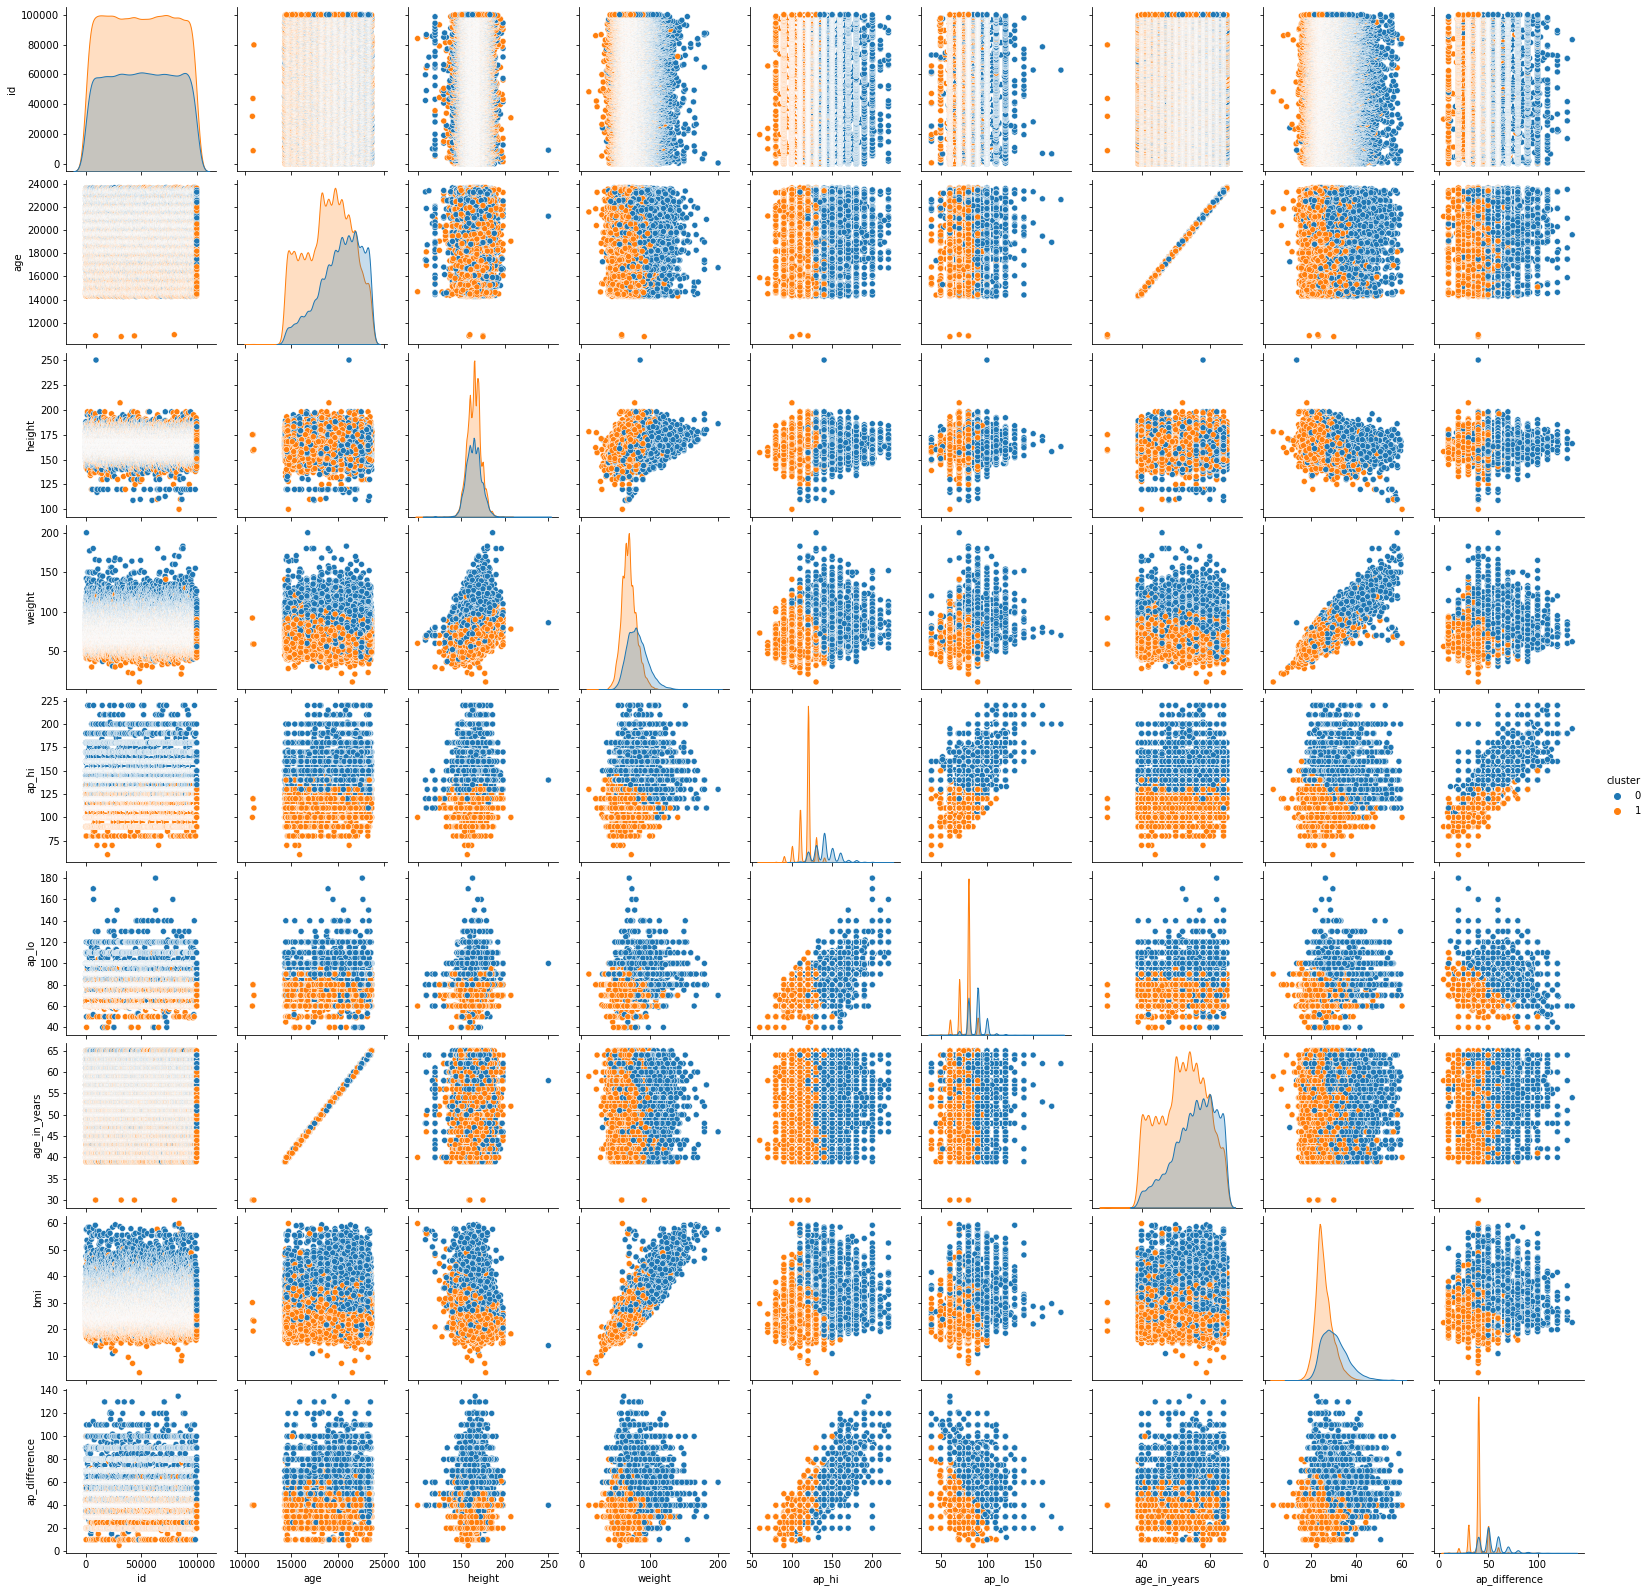

In [23]:
sns.pairplot(data, hue='cluster', vars=data.drop(columns=['cluster', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'cardio', 'active']).columns)